# **Semantic Segmentation - Data Augmentation**

* Emanuele Masiero (872695)
* Simone Vendramini (866229)
* Tommaso Ferrario (869005)

[Competition Link](https://www.kaggle.com/competitions/open-cv-tf-project-3-image-segmentation-round-3)


Dataset:
> M. Rahnemoonfar, T. Chowdhury, A. Sarkar, D. Varshney, M. Yari and R. R. Murphy, "FloodNet: A High Resolution Aerial Imagery Dataset for Post Flood Scene Understanding," in IEEE Access, vol. 9, pp. 89644-89654, 2021, doi: 10.1109/ACCESS.2021.3090981.



## **Imports and Paths**

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [10]:
import os
import sys
import torchvision
import matplotlib.pyplot as plt

# Add the parent directory to the path so we can import the module
sys.path.append("/content/drive/MyDrive/Colab Notebooks/Progetto AML/src")

from tqdm import tqdm
from torch.utils.data import DataLoader
from FloodNetDataset import FloodNetDataset
from Plots import plot_tensor, plot_one_hot_label, convert_label_to_image
from DataAugmentation import DeterministicTransform

In [3]:
batch_size = 64

baseline_path = "/content/drive/MyDrive/Colab Notebooks/Progetto AML/FloodNet-Supervised_v2.0_compressed"

specific_path = {
    "train": {"img": "train/train-org-img", "label": "ColorMasks-TrainSet"},
    "val": {"img": "val/val-org-img", "label": "ColorMasks-ValSet"},
    "test": {"img": "test/test-org-img", "label": "ColorMasks-TestSet"},
}

## **Dataset Loading**

In [4]:
data = FloodNetDataset(
    os.path.join(baseline_path, specific_path["train"]["label"]),
    os.path.join(baseline_path, specific_path["train"]["img"]),
)
dataloader = DataLoader(data, batch_size=batch_size, shuffle=False)

## **Experiments with Data Augmentation**

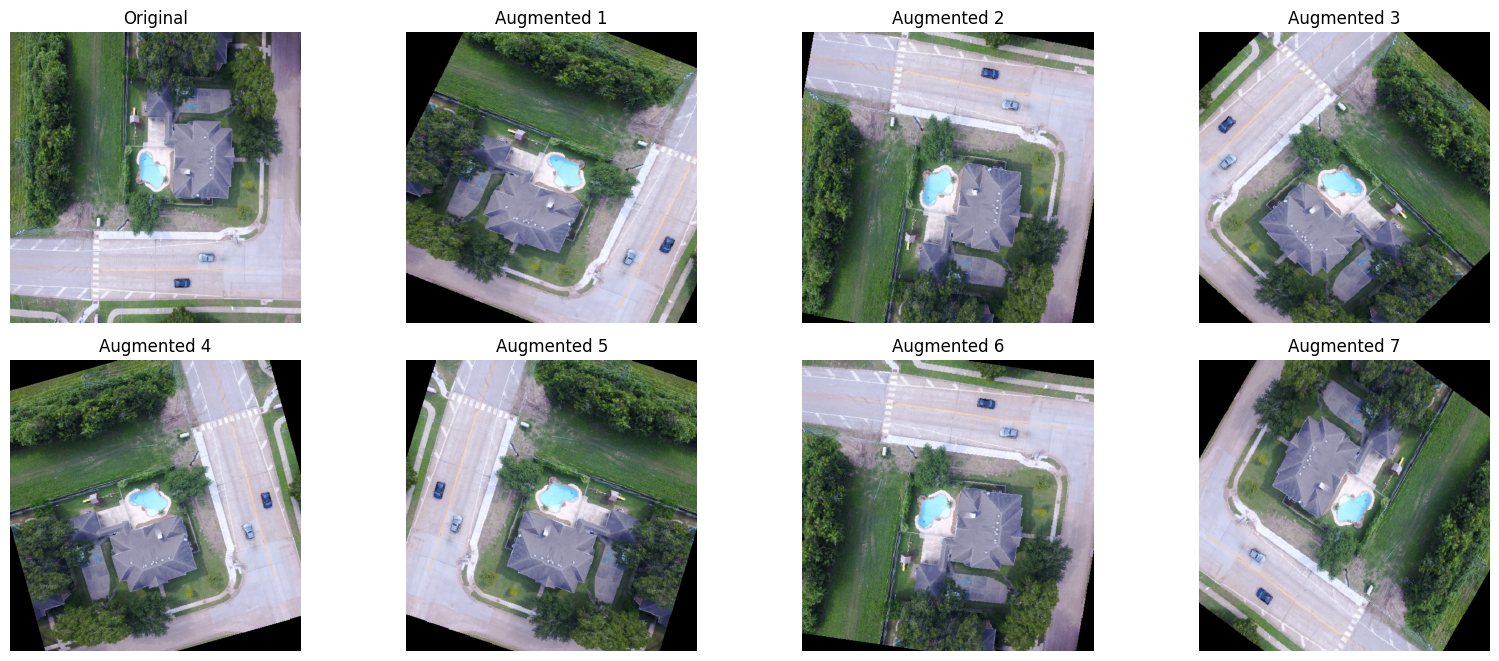

In [6]:
img, label = data[128]

transformer = DeterministicTransform()
augmented_images, augmented_labels = transformer.generate_augmentations(img, label, num_augmentations=7)


plt.figure(figsize=(16, 10))
plt.subplot(3, 4, 1)
plt.imshow(img.permute(1, 2, 0))
plt.title("Original")
plt.axis("off")

for i in range(7):
    plt.subplot(3, 4, i + 2)
    plt.imshow(augmented_images[i].permute(1, 2, 0))
    plt.title(f"Augmented {i + 1}")
    plt.axis("off")

plt.tight_layout()
plt.show()

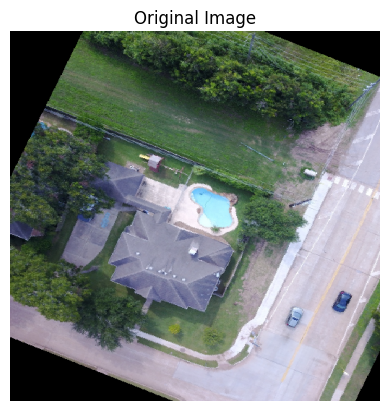

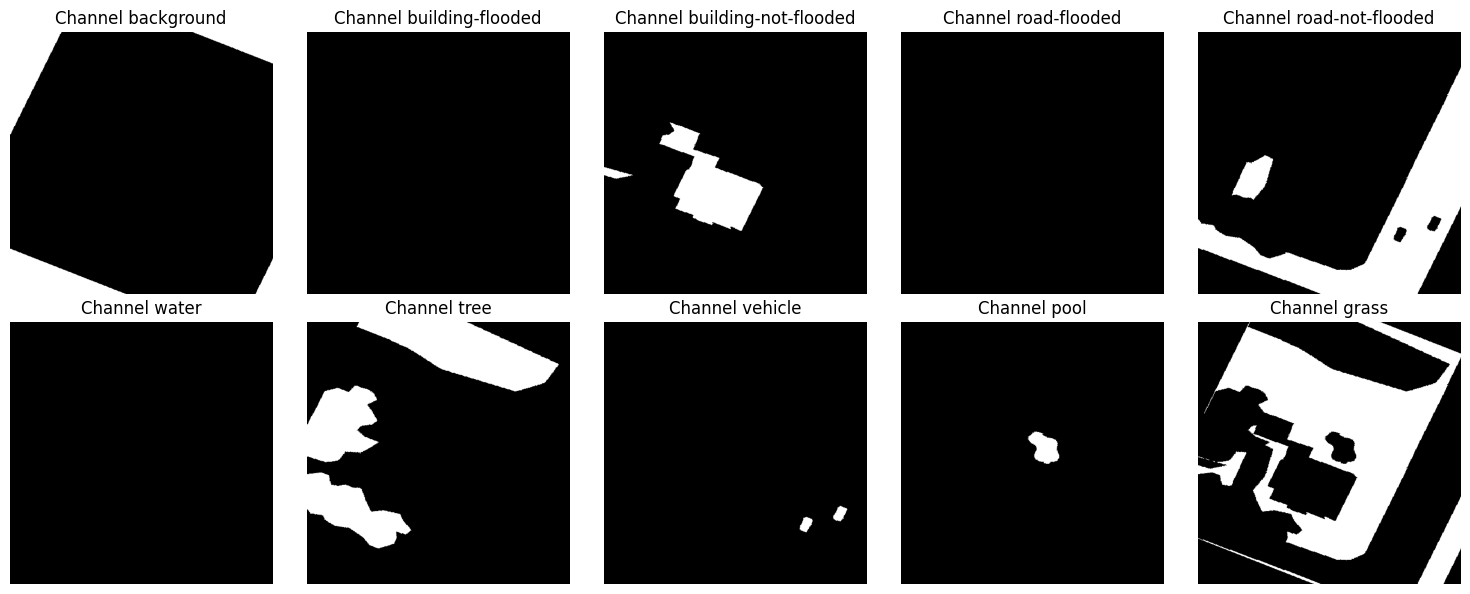

In [7]:
plot_tensor(augmented_images[0], 'Original Image')
plot_one_hot_label(augmented_labels[0])

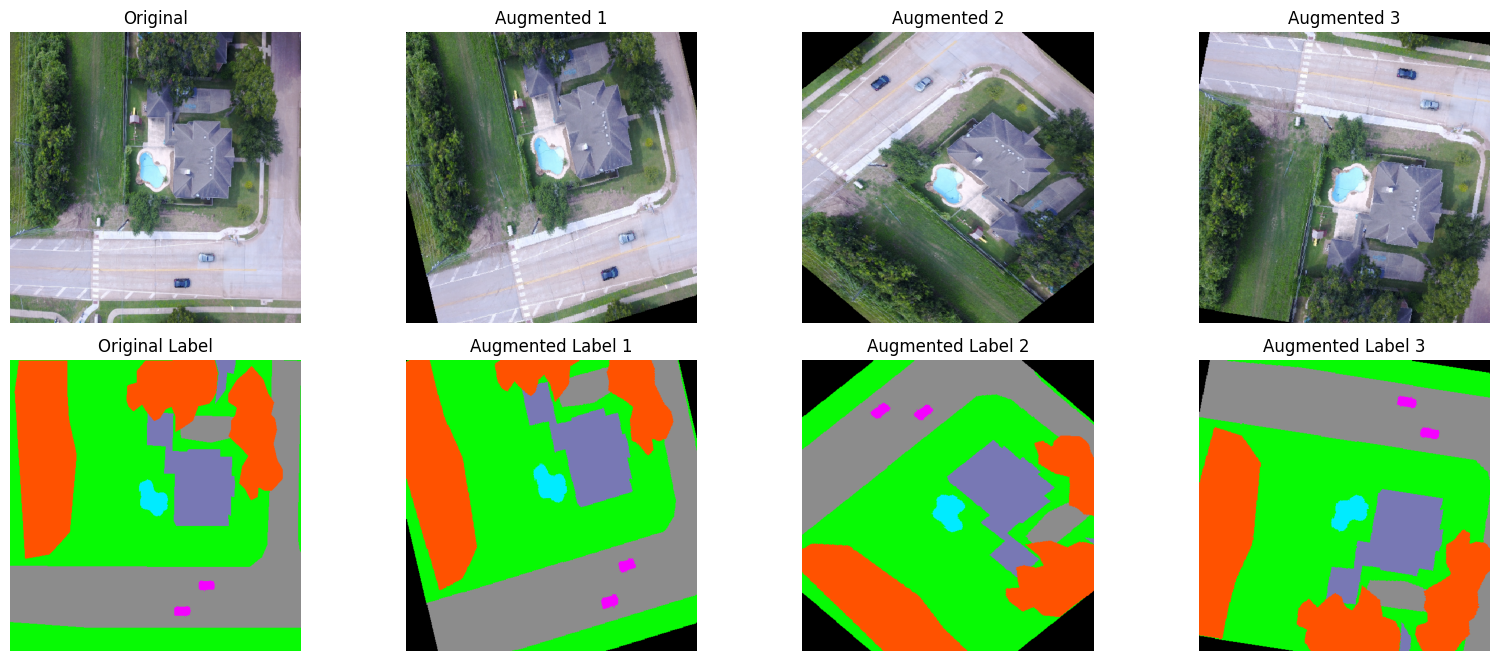

In [18]:
img, label = data[128]

transformer = DeterministicTransform()
augmented_images, augmented_labels = transformer.generate_augmentations(img, label, num_augmentations=3)


plt.figure(figsize=(16, 10))
plt.subplot(3, 4, 1)
plt.imshow(img.permute(1, 2, 0))
plt.title("Original")
plt.axis("off")

for i in range(3):
    plt.subplot(3, 4, i + 2)
    plt.imshow(augmented_images[i].permute(1, 2, 0))
    plt.title(f"Augmented {i + 1}")
    plt.axis("off")

label = label[0]

plt.subplot(3, 4, 5)
plt.imshow(convert_label_to_image(label.cpu()), cmap="gray")
plt.title("Original Label")
plt.axis("off")

for i in range(3):
    plt.subplot(3, 4, i + 6)
    plt.imshow(convert_label_to_image(augmented_labels[i][0].cpu()), cmap="gray")
    plt.title(f"Augmented Label {i + 1}")
    plt.axis("off")

plt.tight_layout()
plt.show()

## **Dataset Train Augmented Creation**

In [ ]:
path_augmented_data = os.path.join("/content/drive/MyDrive/Colab Notebooks/Progetto AML/FloodNet-Supervised_v2.0_compressed", "augmented_data")

if not os.path.exists(path_augmented_data):
    os.makedirs(path_augmented_data)
    os.makedirs(os.path.join(path_augmented_data, "imgs"))
    os.makedirs(os.path.join(path_augmented_data, "labels"))

skip = True

In [ ]:
if not skip:
    for i in tqdm.tqdm(range(len(data))):
        img, label, label_nor = data[i]
        num_im = data.images[i].split(".")[0]
        torchvision.utils.save_image(
            img, os.path.join(path_augmented_data, "imgs", f"{num_im}.jpg")
        )
        torchvision.utils.save_image(
            label_nor, os.path.join(path_augmented_data, "labels", f"{num_im}.png")
        )

        if (7 in label) or (8 in label):
            transformer = DeterministicTransform()

            augmented_images, augmented_labels = transformer.generate_augmentations(
                img, label_nor
            )

            for j in range(len(augmented_images)):
                augmented_image = augmented_images[j]
                augmented_label = augmented_labels[j]

                augmented_label = augmented_label.repeat(3, 1, 1)

                torchvision.utils.save_image(
                    augmented_image,
                    os.path.join(path_augmented_data, "imgs", f"{num_im}_{j}.jpg"),
                )
                torchvision.utils.save_image(
                    augmented_label,
                    os.path.join(path_augmented_data, "labels", f"{num_im}_{j}.png"),
                )